In [1]:
import pandas as pd
df=pd.read_csv('car data.csv')
# df.head()

In [2]:
# print(df['seller_type'].unique())
# print(df['transmission'].unique())
# print(df['owner'].unique())
#print(df['fuel'].unique())

# df.isnull().sum()

# df.columns

dataset=df[['year', 'km_driven', 'fuel', 'seller_type', 'transmission','owner', 'selling_price']]

dataset['current_year']=2020

dataset['age']=dataset['current_year']-dataset['year']

dataset.drop(['year','current_year'],axis=1, inplace=True)



In [3]:
#pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.
#it like converting the categories to column and assign binaary value fashion.
#it covert the categories of fuel column (Diesel,Electric,LPG, Petrol,CNG) in columns (with binary balues) and same goes with seller type, owner.

dataset=pd.get_dummies(dataset)

In [4]:
dataset.corr()

,km_driven,selling_price,age,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
km_driven,1.000000,-0.192289,0.419688,0.002107,0.285396,-0.001372,0.036652,-0.291139,-0.156465,0.182663,-0.089858,-0.120226,0.120226,-0.299731,0.097349,0.195203,-0.083445,0.194713
selling_price,-0.192289,1.000000,-0.413922,-0.037839,0.282947,-0.005095,-0.042434,-0.269453,0.205111,-0.236798,0.110176,0.530205,-0.530205,0.223889,-0.078725,-0.161986,0.048799,-0.111326
age,0.419688,-0.413922,1.000000,-0.008792,-0.121424,0.025540,0.051266,0.114908,-0.143464,0.173703,-0.100225,-0.143800,0.143800,-0.438897,0.186361,0.292349,-0.095795,0.244308
fuel_CNG,0.002107,-0.037839,-0.008792,1.000000,-0.095696,-0.001464,-0.007040,-0.094382,-0.000926,0.006112,-0.014963,-0.032723,0.032723,-0.025832,0.040149,0.021062,-0.006048,-0.007575
fuel_Diesel,0.285396,0.282947,-0.121424,-0.095696,1.000000,-0.015063,-0.072422,-0.970934,0.039364,-0.035314,-0.007911,0.048098,-0.048098,-0.000878,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.001372,-0.005095,0.025540,-0.001464,-0.015063,1.000000,-0.001108,-0.014856,0.027853,-0.026118,-0.002355,0.044746,-0.044746,-0.020804,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,0.036652,-0.042434,0.051266,-0.007040,-0.072422,-0.001108,1.000000,-0.071427,-0.032231,0.035122,-0.011324,-0.024764,0.024764,-0.033379,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.291139,-0.269453,0.114908,-0.094382,-0.970934,-0.014856,-0.071427,1.000000,-0.035360,0.029845,0.012489,-0.039614,0.039614,0.011296,0.011502,-0.012717,0.012427,-0.008502
seller_type_Dealer,-0.156465,0.205111,-0.143464,-0.000926,0.039364,0.027853,-0.032231,-0.035360,1.000000,-0.937703,-0.084557,0.206163,-0.206163,0.224992,-0.067062,-0.165228,0.115054,-0.130250
seller_type_Individual,0.182663,-0.236798,0.173703,0.006112,-0.035314,-0.026118,0.035122,0.029845,-0.937703,1.000000,-0.266904,-0.214163,0.214163,-0.252628,0.072322,0.186573,-0.107886,0.140823


In [5]:
dataset.corr()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# sns.pairplot(dataset)
corrmat=dataset.corr()
top_corr_features=corrmat.index
# plt.figure(figsize=(20,20))
# g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [6]:
X=dataset[['km_driven', 'age', 'fuel_Diesel', 'fuel_Electric','fuel_LPG', 'fuel_Petrol', 'seller_type_Individual','seller_type_Trustmark Dealer', 'transmission_Manual','owner_Fourth & Above Owner', 'owner_Second Owner','owner_Test Drive Car', 'owner_Third Owner']]
y=dataset['selling_price']

In [7]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)
# print(model.feature_importances_)

ExtraTreesRegressor()

In [8]:
# feat_importances=pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(5).plot(kind='barh')
#  plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [10]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomForestRegressor()
#using linspace function to generate evenly spaced numbers over a specified interval in this case it will give bvalues like 100,200.....1200.
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rf_random = RandomizedSearchCV(estimator = rf_random, param_distributions = random_grid, scoring='neg_mean_squared_error', cv = 5, random_state=42, verbose=2)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [11]:
pred=rf_random.predict(X_test)
# pred

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

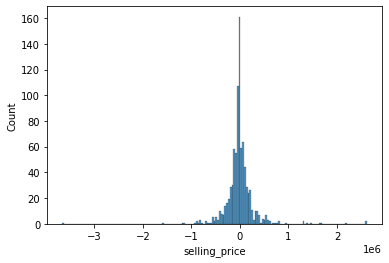

In [12]:
sns.histplot(y_test-pred)

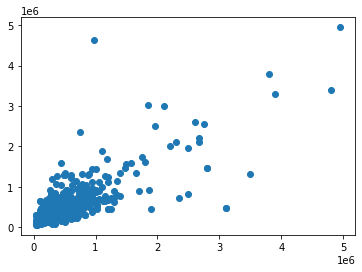

In [13]:
plt.scatter(y_test,pred)